# 1)

## 1)

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score


In [129]:
X,y = make_moons(n_samples=1000,random_state=42,noise=0.3)

In [130]:
df = pd.DataFrame(X)
df['y']=y
df=df.rename(columns={0:"X1",1:"X2"})
df

,X1,X2,y
0,-0.171863,0.596249,1
1,1.253283,-0.265414,1
2,0.723224,0.231943,1
3,-0.065198,-0.655194,1
4,-0.799493,0.552935,0
...,...,...,...
995,0.861014,0.343843,0
996,-0.229425,0.754849,0
997,1.770957,-0.509436,1
998,-1.061772,0.006786,0


In [131]:
df.isna().sum()

X1    0
X2    0
y     0
dtype: int64

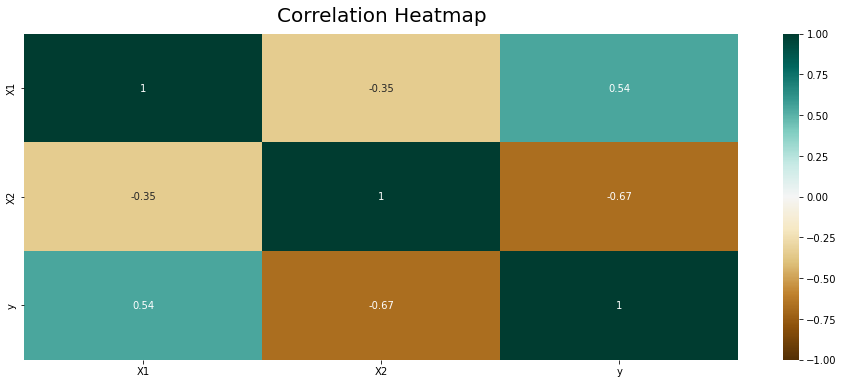

In [132]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [133]:
ul1 = df["X1"].mean() + 3*df["X1"].std()
ll1 = df["X1"].mean() - 3*df["X1"].std()
i = 1
for j in range(len(df["X1"])):
      if (ll1 >= df.at[j,df.columns[i]] or df.at[j,df.columns[i]] >= ul1):
        df = df.drop(index = j)


ul2 = df["X2"].mean() + 3*df["X2"].std()
ll2 = df["X2"].mean() - 3*df["X2"].std()
i = 1
for j in range(len(df["X2"])):
      if (ll2 >= df.at[j,df.columns[i]] or df.at[j,df.columns[i]] >= ul2):
        df = df.drop(index = j)


In [134]:
X_ = df.drop(columns=['y'])
y_ = df['y']
X_train, X_test, y_train, y_test = tts(X_, y_, test_size=0.2)

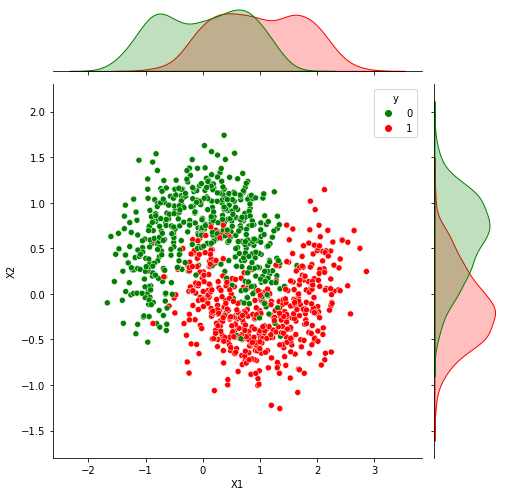

In [135]:
g = sns.jointplot(x="X1",
               y="X2",
               hue="y",
               height=7,
               data=df,
               palette=['green','red'])

In [136]:
from sklearn.tree import DecisionTreeClassifier
list1=[]
list2=[]
for i in range(1,20):
  list2.append(i)
  Classifier = DecisionTreeClassifier(random_state = 0,max_depth=i) 
  
  Classifier.fit(X_train, y_train)
  
  Pred1 = Classifier.predict(X_test)
  list1.append(accuracy_score(y_test,Pred1)*100)

print("Maximum Accuracy is: ")
print(max(list1))
a=list1.index(max(list1))+1
print("optimal Max_depth = ",a)

Maximum Accuracy is: 
92.0
optimal Max_depth =  6


Text(0, 0.5, 'Accuracy')

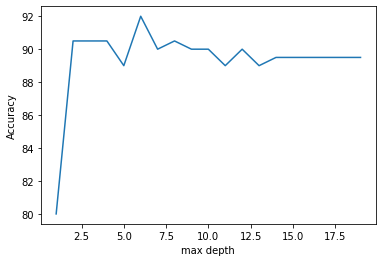

In [137]:
plt.plot(list2,list1)
plt.xlabel('max depth')
plt.ylabel('Accuracy')

At max_depth = a , the accuracy is maximum. So that is optimal hyper parameter.





### Decision Tree Classifier

In [138]:
Classifier1 = DecisionTreeClassifier(max_depth=a) 
Classifier1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [139]:
!pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


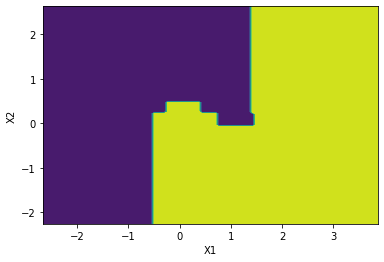

In [140]:
from sklearn.inspection import DecisionBoundaryDisplay
D = DecisionBoundaryDisplay.from_estimator(Classifier1,X_train,response_method="predict")
# D.ax_.scatter(df["X1"],df["X2"], c=y,edgecolor="r")

### Bagging Classifier

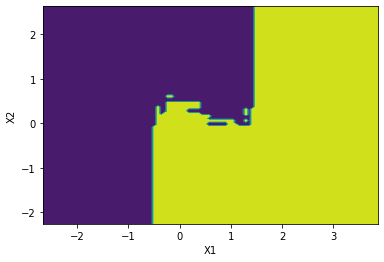

In [141]:
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier()
Bagging.fit(X_train,y_train)
D = DecisionBoundaryDisplay.from_estimator(Bagging,X_train,response_method="predict")
# D.ax_.scatter(df["X1"],df["X2"], c=y,edgecolor="r")

Maximum Accuracy is : 92.0  %
For Number of Estimator :  100


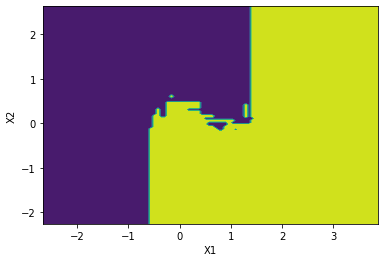

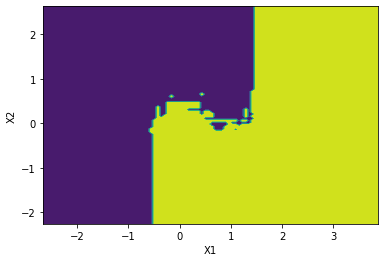

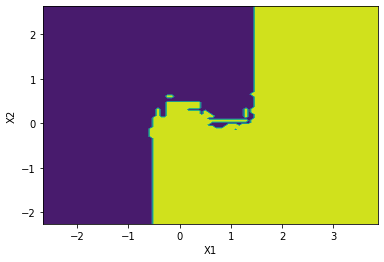

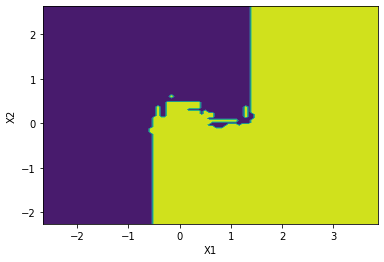

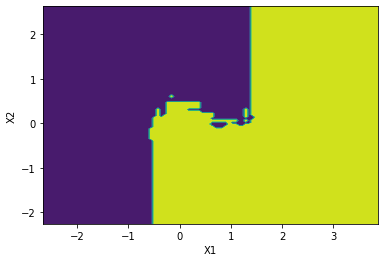

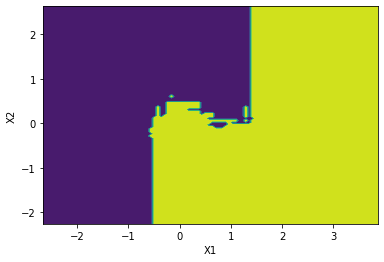

In [142]:
l1 = []
for i in range(50,301,50):
  Bagging = BaggingClassifier(n_estimators=i)
  Bagging.fit(X_train,y_train)
  D = DecisionBoundaryDisplay.from_estimator(Bagging,X_train,response_method="predict")
  # D.ax_.scatter(df["X1"],df["X2"], c=y,edgecolor="r")
  pred = Bagging.predict(X_test)
  l1.append(accuracy_score(y_test,pred))

print("Maximum Accuracy is :", max(l1)*100," %")
print("For Number of Estimator : ", (l1.index(max(l1))+1)*50)    

### Random Forest Classifier

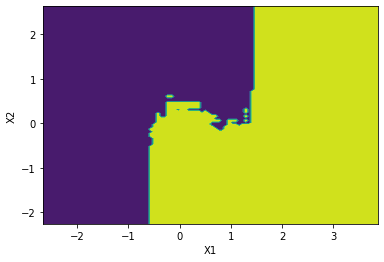

In [143]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier()
Random.fit(X_train,y_train)
D = DecisionBoundaryDisplay.from_estimator(Random,X_train,response_method="predict")
# D.ax_.scatter(df["X1"],df["X2"], c=y,edgecolor="r")

Maximum Accuracy is : 92.0  %
For Number of Estimator :  50


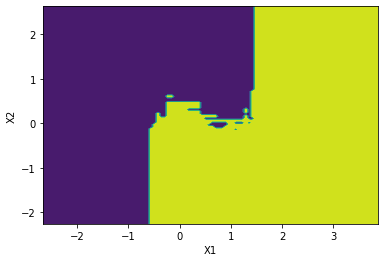

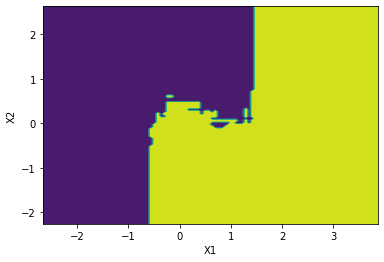

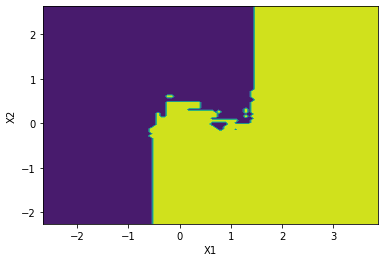

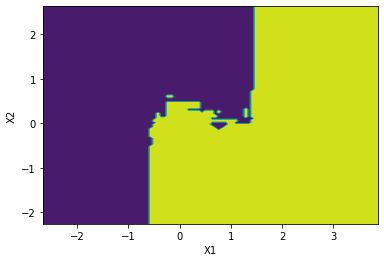

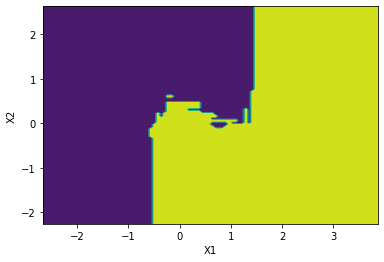

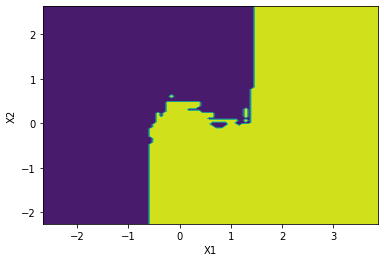

In [144]:
l2=[]
for i in range(50,301,50):
  Random = RandomForestClassifier(n_estimators=i)
  Random.fit(X_train,y_train)
  D = DecisionBoundaryDisplay.from_estimator(Random,X_train,response_method="predict")
  # D.ax_.scatter(df["X1"],df["X2"], c=y,edgecolor="r")
  pred = Random.predict(X_test)
  l2.append(accuracy_score(y_test,pred))

print("Maximum Accuracy is :", max(l2)*100 ," %")
print("For Number of Estimator : ", (l2.index(max(l2))+1)*50)  

## 2) Implementing Bagging From Scratch

In [145]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
from sklearn.utils import resample

In [147]:
# Implementing Bagging from Scratch

class Bagging_Classifier:

  def __init__(self,n_estimators):

    # Defining different variable used in class  
    self.n_estimators = n_estimators
    self.ModelsArray = []
    self.Final_prediction = []
    self.All_predictions = []
    self.Sampling = []
    from sklearn.tree import DecisionTreeClassifier


  def train(self,X_train,y_train):

    # Training different models
    for i in range(self.n_estimators):

      #Sampling Rows with Replacement
      X_train['y_train'] = y_train
      X_train = resample(X_train, n_samples = int(0.8*len(X_train)),replace = True)
      y_train = X_train['y_train']
      X_train=X_train.drop(columns=['y_train'],axis=1)
      self.Sampling.append([X_train,y_train])
      #Training each model using default Decision Tree Classifier
      estimator = DecisionTreeClassifier()
      estimator.fit(X_train,y_train)
      self.ModelsArray.append(estimator)

  def predict(self,X_test):
    # All predictions modelwise stored in All_predictions array
    
    for i in range(self.n_estimators):
      pred = self.ModelsArray[i].predict(X_test)
      self.All_predictions.append(pred)
    
    for j in range(len(self.All_predictions[0])):
      # Voting for each row prediction
      Votes=[]
      for i in range(len(self.All_predictions)): 
        Votes.append(self.All_predictions[i][j])

      Unique = list(set(Votes))
      
      count_unique = []
      for i in range(len(Unique)) :
        x = Votes.count(Unique[i])     
        count_unique.append(x)
      
    #calculating final prediction by voting technique
      ind = count_unique.index(max(count_unique)) # count majority votes
      self.Final_prediction.append(Unique[ind])


  def score(self,y_test):
    #calculating accuracy score
    S = accuracy_score(y_test,self.Final_prediction)
    return S*100

  def EachTreeAcc(self,X_train,y_test):
    All_trees=[]
    for i in range(len(self.All_predictions)):
      A = accuracy_score(y_test,self.All_predictions[i])
      All_trees.append(A*100)
    return All_trees

  def EachTreeDB(self):
    #Decision Boundaries for each estimator
    for i in range(self.n_estimators):
      if 'y_train' in self.Sampling[i][0].columns :
        self.Sampling[i][0] = self.Sampling[i][0].drop(columns=['y_train'],axis=1)
      D = DecisionBoundaryDisplay.from_estimator(self.ModelsArray[i],self.Sampling[i][0],response_method="predict")


In [148]:
BC = Bagging_Classifier(10)
BC.train(X_train,y_train)
BC.predict(X_test)
s=BC.score(y_test)

print("Accuracy of Bagging_Classifier implemented from Scratch is : ",s," %")

print("Accuracies of Each of the estimstor tree are :" ,BC.EachTreeAcc(X_train,y_test))

Accuracy of Bagging_Classifier implemented from Scratch is :  90.5  %
Accuracies of Each of the estimstor tree are : [89.0, 87.5, 88.5, 87.5, 85.5, 90.0, 89.5, 85.5, 84.0, 84.5]


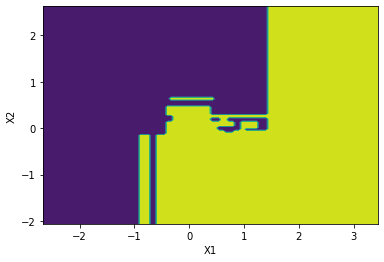

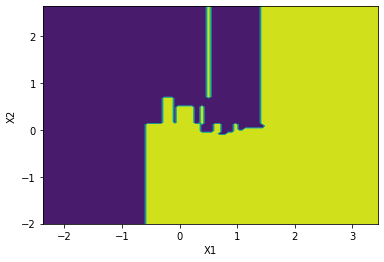

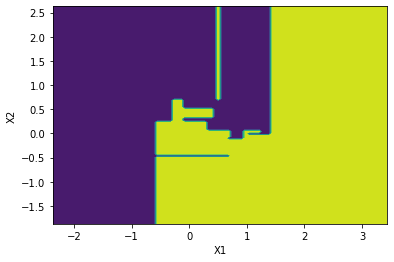

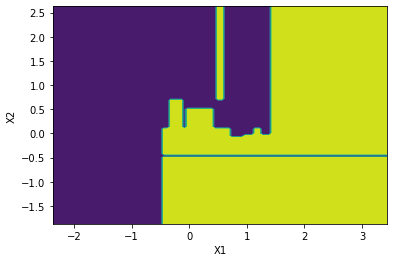

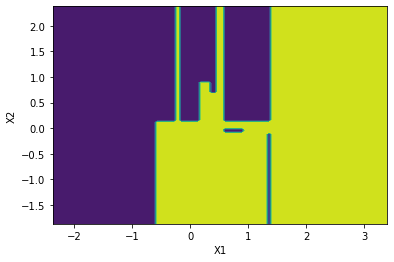

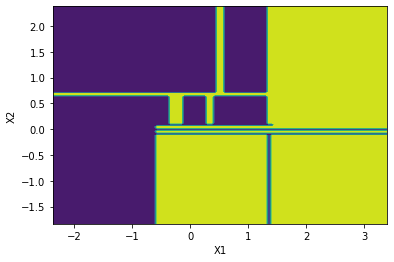

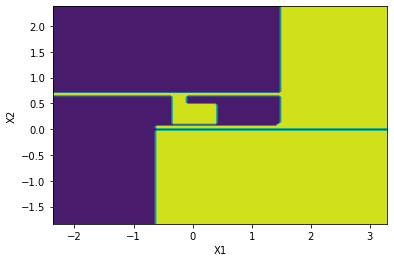

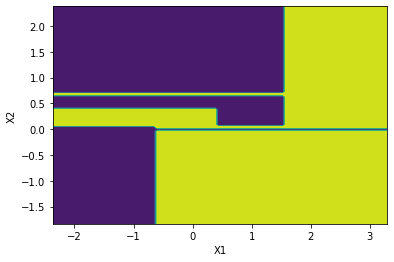

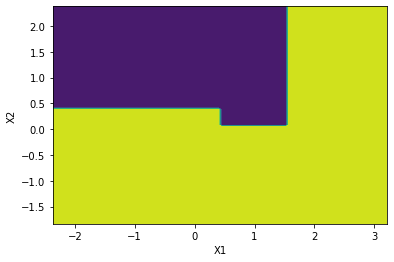

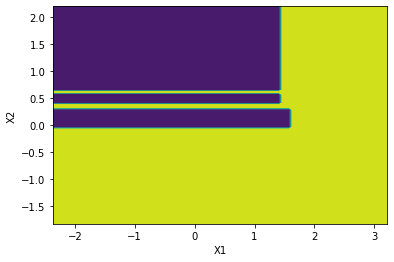

In [149]:
BC.EachTreeDB()

# 2)

## AdaBoost

In [167]:
if 'y_train' in X_train.columns :
  X_train = X_train.drop(columns=['y_train'],axis=1)

In [166]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()

AdaBoost.fit(X_train,y_train)
pred = AdaBoost.predict(X_test)
pred_ = AdaBoost.predict(X_train)
A = accuracy_score(y_test,pred)
A_ = accuracy_score(y_train,pred_)
print("Accuracy of AdaBoost Classifier on test data is: ",A*100," %")
print("Accuracy of AdaBoost Classifier on train data is: ",A_*100," %")


Accuracy of AdaBoost Classifier on test data is:  89.0  %
Accuracy of AdaBoost Classifier on train data is:  94.0  %


## XGBoost

In [168]:
import xgboost as XGBoost
DMat = XGBoost.DMatrix(data=X,label=y) 

XGBoost_clf = XGBoost.XGBClassifier(subsample=0.7)
XGBoost_clf.fit(X_train,y_train)

pred1 = XGBoost_clf.predict(X_test)
pred1_ = AdaBoost.predict(X_train)
A1 = accuracy_score(y_test,pred1)
A1_ = accuracy_score(y_train,pred1_)
print("Accuracy of XGBoost Classifier on test data is: ",A1*100," %")
print("Accuracy of XGBoost Classifier on train data is: ",A1_*100," %")


Accuracy of XGBoost Classifier on test data is:  91.0  %
Accuracy of XGBoost Classifier on train data is:  94.0  %


## LightGBM

Text(0.5, 1.0, 'LightGBM Classifier')

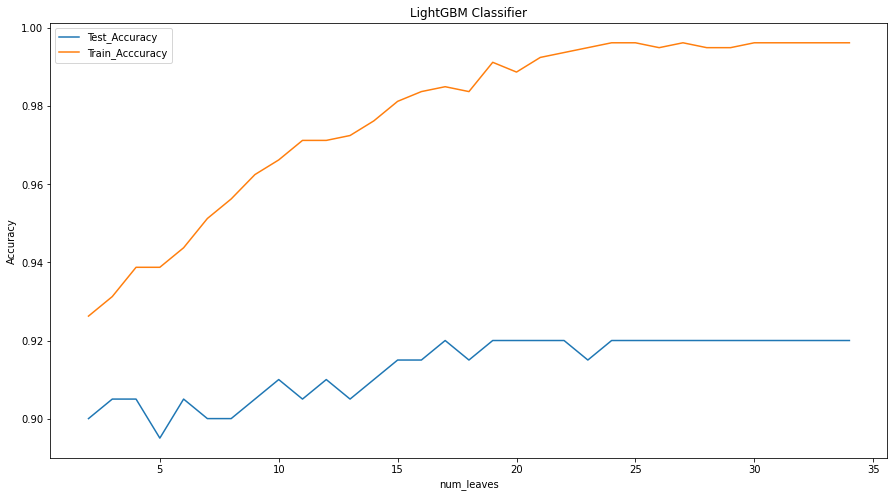

In [153]:
import lightgbm as LightGBM
plt.figure(figsize=(15, 8))
l_test=[]
l_train=[]
x=[]
for i in range(2,35):
  x.append(i)
  LightGBM_clf = LightGBM.LGBMClassifier(num_leaves=i)
  LightGBM_clf.fit(X_train,y_train)
  pred2_ = LightGBM_clf.predict(X_train)
  pred2 = LightGBM_clf.predict(X_test)
  A2_ = accuracy_score(y_train,pred2_)
  A2 = accuracy_score(y_test,pred2)
  l_test.append(A2)
  l_train.append(A2_)

plt.plot(x,l_test, label = 'Test_Accuracy')
plt.plot(x,l_train,label = 'Train_Acccuracy' )
plt.legend()
plt.xlabel("num_leaves")
plt.ylabel("Accuracy")
plt.title("LightGBM Classifier")

It starts Overfitting after num_leaves=30.


Text(0.5, 1.0, 'LightGBM Classifier')

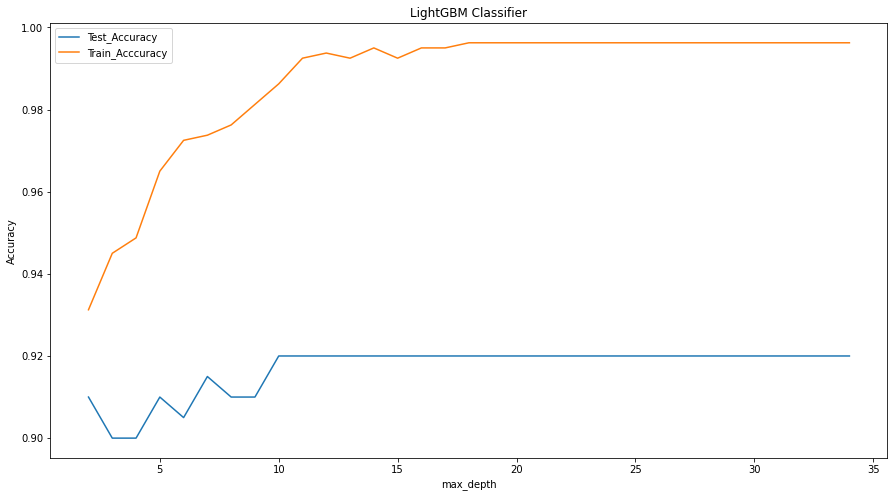

In [154]:
plt.figure(figsize=(15, 8))
l_test=[]
l_train=[]
x=[]
for i in range(2,35):
  x.append(i)
  LightGBM_clf = LightGBM.LGBMClassifier(max_depth=i)
  LightGBM_clf.fit(X_train,y_train)
  pred2_ = LightGBM_clf.predict(X_train)
  pred2 = LightGBM_clf.predict(X_test)
  A2_ = accuracy_score(y_train,pred2_)
  A2 = accuracy_score(y_test,pred2)
  l_test.append(A2)
  l_train.append(A2_)

plt.plot(x,l_test, label = 'Test_Accuracy')
plt.plot(x,l_train,label = 'Train_Acccuracy' )
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("LightGBM Classifier")

We can see that as num_leaves increases the max_depth also increases.

To get good results using a leaf-wise tree, these are some important parameters:

num_leaves: This is the main parameter to control the complexity of the tree model. Theoretically, we can set num_leaves = 2^(max_depth) to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the num_leaves, we should let it be smaller than 2^(max_depth). For example, when the max_depth=7 the depth-wise tree can get good accuracy, but setting num_leaves to 127 may cause over-fitting, and setting it to 70 or 80 may get better accuracy than depth-wise.

min_data_in_leaf: This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and num_leaves. Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

max_depth: You also can use max_depth to limit the tree depth explicitly.

## AdaBoost Decision Boundary

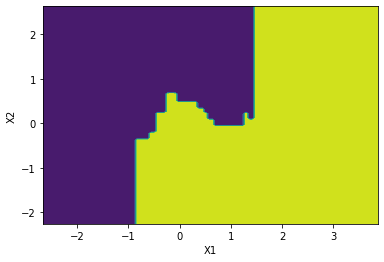

In [155]:
D = DecisionBoundaryDisplay.from_estimator(AdaBoost,X_train,response_method="predict")
# D.ax_.scatter(df["X1"],df["X2"], c=y,edgecolor="r")

## Xgboost Decision Boundary

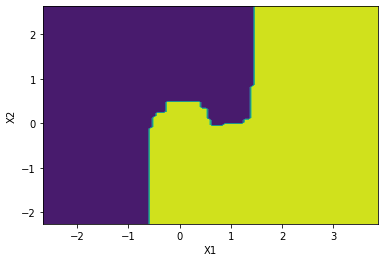

In [156]:
D = DecisionBoundaryDisplay.from_estimator(XGBoost_clf,X_train,response_method="predict")
# D.ax_.scatter(df["X1"],df["X2"], c=y,edgecolor="r")

## LightGBM Decision Boundary

In [169]:
LightGBM_clf1 = LightGBM.LGBMClassifier(num_leaves=7)
LightGBM_clf1.fit(X_train,y_train)

pred3 = LightGBM_clf1.predict(X_test)
A3 = accuracy_score(y_test,pred3)
print("Accuracy of LightGBM Classifier on test data is: ",A3*100," %")
pred3_ = LightGBM_clf1.predict(X_train)
A3_ = accuracy_score(y_train,pred3_)
print("Accuracy of LightGBM Classifier on train data is: ",A3_*100," %")

Accuracy of LightGBM Classifier on test data is:  90.0  %
Accuracy of LightGBM Classifier on train data is:  95.125  %


In [158]:
from matplotlib.colors import ListedColormap

def boundaries(classifier,X_test):
    h = .02  # step size in the mesh
    x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
    y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.array(classifier.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    cmap_custom = ListedColormap(['#FFD700', '#B0E0E6', '#800080'])
    plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.8)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


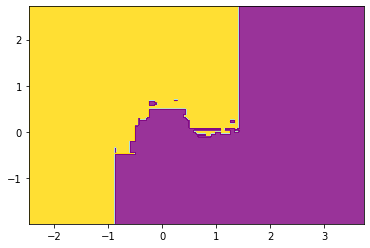

In [159]:
boundaries(LightGBM_clf1,X_test)

# 3)

## Bayes Classifier

In [172]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train,y_train)
p=GNB.predict(X_test)
a = accuracy_score(y_test,p)
print("Accuracy of the Gaussain Naive Bayes Classifier is :",a*100," %")

Accuracy of the Gaussain Naive Bayes Classifier is : 85.0  %


## Voting Classifier 


In [170]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[
        ('GNB', GNB), ('LGBM', LightGBM_clf1), ('Ada', AdaBoost ),('XGB', XGBoost_clf)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
pred4 = eclf1.predict(X_test)

A4 = accuracy_score(y_test,pred4)
print("Accuracy of Voting Classifier on test data is: ",A4*100," %")

Accuracy of Voting Classifier on test data is:  90.0  %
